# **Daegu Apartment Pricing Prediction**

by: Nabila Ryrie 
---

**Contents:**
1. Overview
2. Data Understanding
3. Data Preprocessing
4. Modelling
5. Feature Importance
6. Conclusion
7. Recommendation

# **Overview**

### **Business Background**

Daegu is a bustling city located in South Korea, known for its rich history, vibrant culture, and economic significance. Situated in the southeastern part of the country, Daegu is the fourth-largest city in South Korea and serves as a major transportation hub. The city is known for its thriving economy, particularly in industries like textiles, manufacturing, and technology. It's often referred to as the "Textile Capital of South Korea" due to its strong presence in the textile industry. Additionally, Daegu boasts a variety of cultural attractions, including museums, temples, and festivals that showcase the city's rich heritage. Overall, Daegu is a dynamic city that seamlessly blends its historical roots with modern innovation, making it a fascinating destination for travelers and a vibrant place to live for its residents. 

Apartments are a popular solution for housing in cities where land is limited, such as in Daegu. Sellers set prices for their units based on market demand. It's tricky because if prices are too high, they won't sell well, but if they're too low, sellers miss out on profits.

### **Goals**

In order to provide a fixed pricing rate for potential home, we will use machine learning to predict a model that could show potential home-owners apartment pricings based on the amenities that each apartment has, and the facilities that are affecting pricing rates. Agents then can create rates that are most optimal for them to charge the clients with, in accordance to the clients' needs.

### **Evaluation Metrics**

We will be using **RMSE (Root Mean Square Error), MAPE (Mean Absolute Percentage Error) and MAE (Mean Absolute Error)** for the evaluation metrics that will be tested with our model. RMSE measures the square root of the average squared differences between predicted and actual values, MAE calculates the average absolute differences, and MAPE computes the average percentage differences from the regression model. Lower RMSE, MAE, and MAPE values suggest better accuracy in predicting rental prices based on the selected features.

In case the final model is linear, R-squared or adjusted R-squared may be utilized. R-squared evaluates how well the model captures the overall variability in the data, with values closer to 1 indicating a stronger alignment with observed data. However, these metrics are not applicable for non-linear models.

### **Data Features**

Here are the columns present in our dataset, which we will utilize for understanding the data, gaining domain knowledge, and making predictions.

| Columns         | Description                                      |
|-------------------|------------------------------------------------|
| Hallway Type           | Apartment type             |
| TimeToSubway         | Time needed to the nearest subway station |
| SubwayStation       | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC)       | The number of facilities nearby       |
| N_FacilitiesNearBy(PublicOffice)        | The number of public office facilities nearby |
| N_SchoolNearBy(University) | The number of universities nearby                     |
| N_Parkinglot(Basement)        | The number of the parking lot                               |
| YearBuilt      | The year the apartment was built         |
| N_FacilitiesInApt         | Number of facilities in the apartment |
| Size(sqft)        | The apartment size (in square feet)         |
| SalePrice    | The apartment price (Won)                  |

# **Data Understanding**

### **View of Overall Data**

In [14]:
# Library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

In [15]:
# Load the dataset

df = pd.read_csv('daegu.csv')
display(pd.DataFrame(df.head()))
display(df.shape)
display(df.info())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


(4123, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


None

Our original dataset before cleaning and wrangling has 4132 rows, and 11 columns. We can also see that the columns `HallwayType`, `TimeToSubway` and `SubwayStation` are categorical, while the rest are numerical.

In [16]:
# Unique Values check

pd.set_option('display.max_colwidth', None)

unique = []
for i in df.columns :
    unique.append( [i, df[i].nunique(), df[i].unique()])

unique_val = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique)
unique_val

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


As based on the unique values above, there are no unique samples out of the ordinary that we can consider an anomaly.

### **Data Cleaning**

In [17]:
# Checking for null values 
df.isna().sum()
display(df.isna().sum())

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [18]:
duplicates_per_column = {}
for column in df.columns:
    duplicates_per_column[column] = len(df) - df[column].duplicated().sum()

output_df = pd.DataFrame(duplicates_per_column, index=[0]).T
output_df.columns = ['Duplicates']

duplikat = df.duplicated().sum()

print(output_df)
print(f'There are {duplikat} duplicated rows in total.')

                                  Duplicates
HallwayType                                3
TimeToSubway                               5
SubwayStation                              8
N_FacilitiesNearBy(ETC)                    4
N_FacilitiesNearBy(PublicOffice)           8
N_SchoolNearBy(University)                 6
N_Parkinglot(Basement)                    20
YearBuilt                                 16
N_FacilitiesInApt                          9
Size(sqf)                                 89
SalePrice                                838
There are 1422 duplicated rows in total.


Our dataset has zero null values, but 1422 duplicates.

In [19]:
# Checking for the amount of duplicates in percentage

duplicates = df.duplicated().sum()
duplicates / len(df) * 100

34.48944943002668

Our duplicates constitutes 34.5% of the total data. While dropping duplicates is typically advisable, however, given their significant proportion in our dataset we plan to first examine these duplicated values to understand their significance before making a decision to remove them.

In [20]:
check_dupe = df[df.duplicated()]
check_dupe

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Based on examples in row 55 and 122, along with 4114, 4115, and 4120, we can assume that data duplication occurs for apartments within the same building and having the same facilities, only in different units. Consequently, we can safely remove these duplicates, as the duplicated rows can be represented by one row with the exact same values. Thus, our model can refer to that one row when making predictions.

In [21]:
# Dropping duplicated data
df.drop_duplicates(inplace=True)

# Checking if data is dropped
df.isna().sum()
display(df.isna().sum())

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

After dropping our duplicated values, we can proceed with checking for outliers.

### **Checking for Outliers**

In predictive modeling, spotting outliers is crucial as it can influence predictions. Deciding whether to keep or remove them depends on factors like the data's characteristics and the specific prediction task. Therefore, it's important to carefully look at outliers to understand them before deciding to drop them.

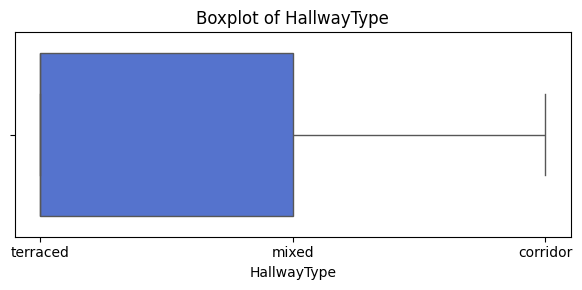

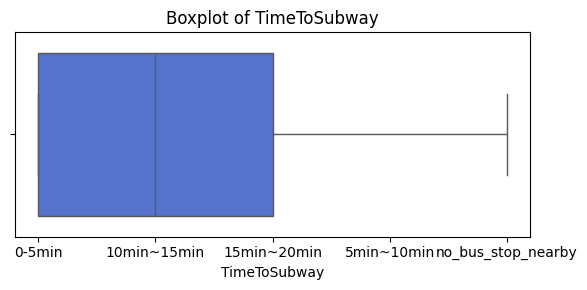

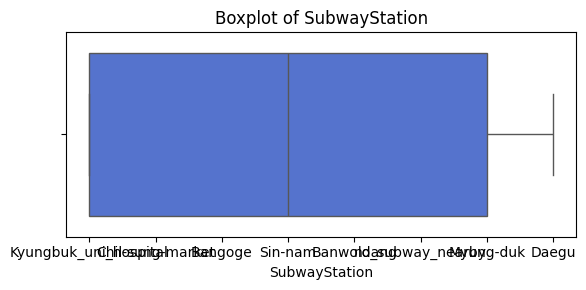

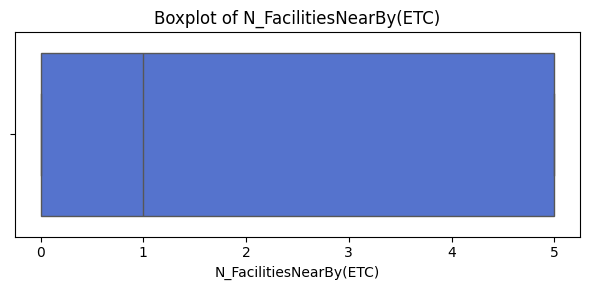

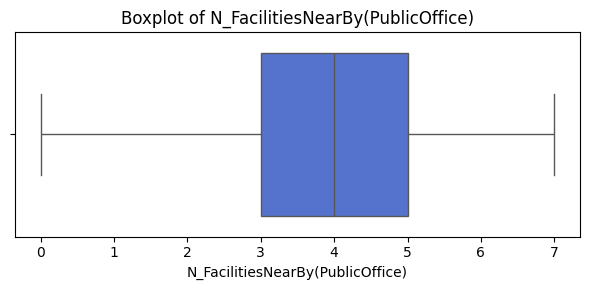

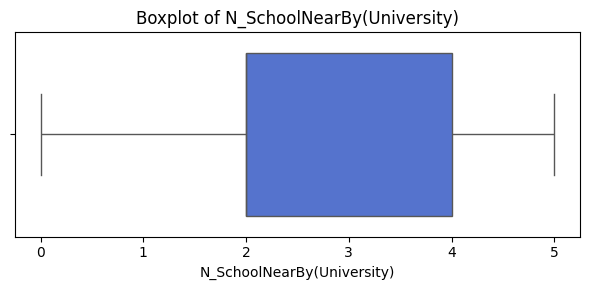

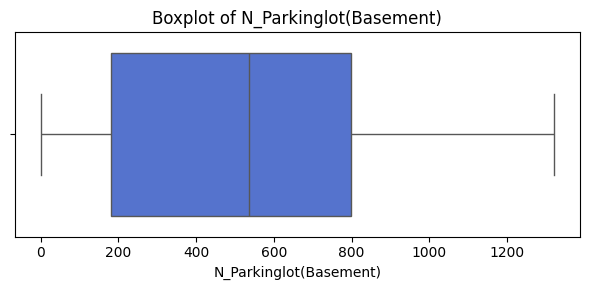

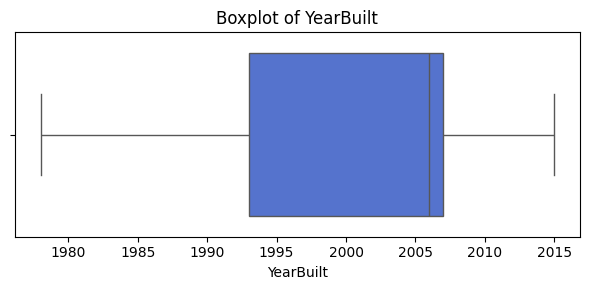

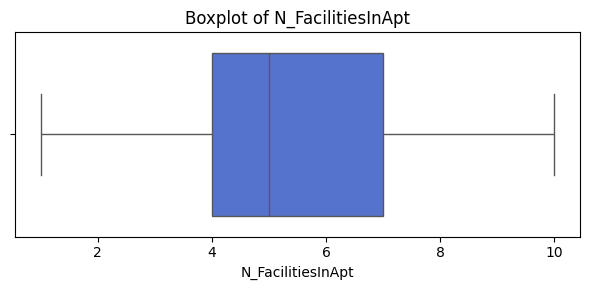

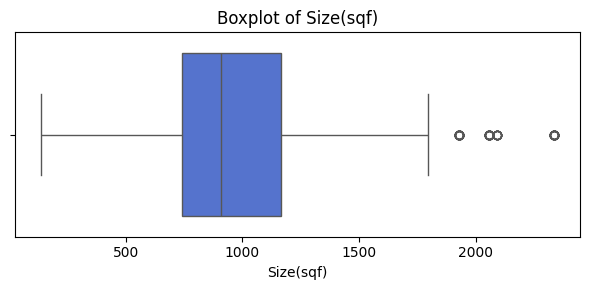

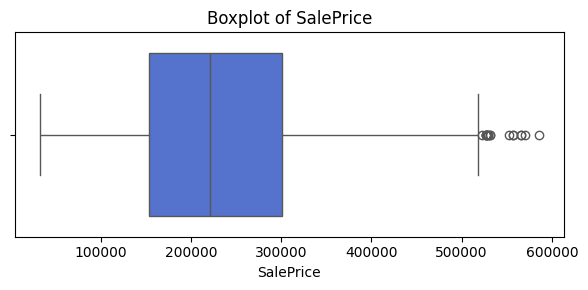

In [22]:
for column in df.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(data = df[column], orient = 'h', color='royalblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()


The boxplot above displays outliers for two columns: `Size(sqf)`, indicating apartment dimensions, and `SalePrice`, indicating the price of each unit for rent. Next, we'll identify the rows with the highest sale price and largest size in square feet to establish criteria for further analysis.

In [23]:
outlier_columns = ['Size(sqf)', 'SalePrice']

for i in outlier_columns:
    q1, q3 = df[i].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 
    outlier_count = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)].count()
    percentage_outliers = (outlier_count / len(df[i])) * 100

    print(f"The '{i}' column has {outlier_count} outliers, representing {percentage_outliers:.2f}% of total data points.")


The 'Size(sqf)' column has 84 outliers, representing 3.11% of total data points.
The 'SalePrice' column has 17 outliers, representing 0.63% of total data points.


In [24]:
df.sort_values(by='SalePrice', ascending=False)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,557522
...,...,...,...,...,...,...,...,...,...,...,...
647,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
1068,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
163,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
3625,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34070


In [25]:
df.sort_values(by='Size(sqf)', ascending=False)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
546,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
3356,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,227433
2873,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,203539
3901,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,292035
2880,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,351769
...,...,...,...,...,...,...,...,...,...,...,...
1567,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,60973
199,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,53274
1650,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,62831
1721,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,53982


Based on our domain knowledge, larger-sized units tend to command higher prices, and it's not uncommon to have availability of spacious apartments. Therefore, we've decided not to remove these outliers as they can be utilized to make predictions for larger sized unit pricing.

## **Define Features**

To identify the features for our feature and target variables, we'll assess correlations between columns. Initially, we'll segregate categorical and numeric values. Then, we'll analyze data distribution to select the appropriate statistical method for correlation analysis.

In [26]:
# Define numerical and categorical data column
numerical = df.select_dtypes(include=['float64', 'int64'])
categorical = df.select_dtypes(include=['object'])

# Checking if the data is normally distributed or not to see the correlations
from scipy.stats import normaltest

for i in numerical.columns:
    stats, p_val = normaltest(df[i])
    if p_val >= 0.05:
        print(f"{i} data is distributed normally")
    else:
        print(f"{i} data is not distributed normally")

N_FacilitiesNearBy(ETC) data is not distributed normally
N_FacilitiesNearBy(PublicOffice) data is not distributed normally
N_SchoolNearBy(University) data is not distributed normally
N_Parkinglot(Basement) data is not distributed normally
YearBuilt data is not distributed normally
N_FacilitiesInApt data is not distributed normally
Size(sqf) data is not distributed normally
SalePrice data is not distributed normally


As our dataset is not distributed normally, we will use the Spearman statistical method for our correlation analysis.

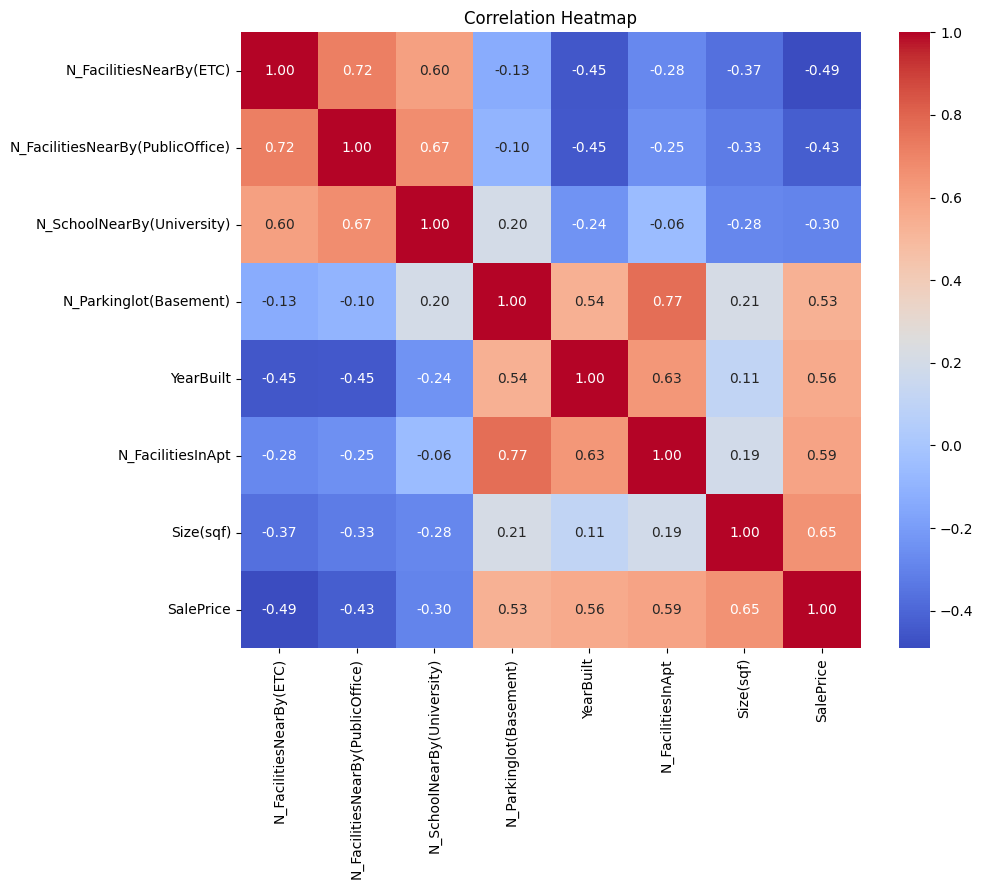

In [27]:
plt.figure(figsize=(10, 8))  
sns.heatmap(numerical.corr(method = 'spearman'), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()


- Overall, all features show medium correlations (0.3 to 0.7) with apartment prices, indicating their relevance. Apartment size exhibits the highest correlation, suggesting larger apartments command higher prices.
- Other features positively correlated with prices include the number of apartment facilities, construction year, and basement parking availability.
- Conversely, nearby public office facilities, other amenities, and universities show medium negative correlations with prices, suggesting their presence correlates with lower prices.
- Strong correlations exist between the number of nearby facilities and universities, as well as nearby facilities and public office facilities, indicating multicollinearity, which may affect regression analysis stability.

Based on this analysis, we conclude that all our dataset columns have an impact on pricing predictions and will be included in our predictive models.

## **Modeling**

In [28]:
# Library

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error

# Warnings
import warnings
warnings.filterwarnings('ignore')

**Splitting Data**

In [29]:
# Split data
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    random_state=2024,
    test_size=0.2
)

Let's define variables x and y. In regression modeling, x represents the independent variables used to predict y, the dependent variable.

X includes HallwayType, TimeToSubway, SubwayStation, N_FacilitiesNearBy (ETC), N_FacilitiesNearBy (PublicOffice), N_SchoolNearBy (University), N_Parkinglot (Basement), YearBuilt, N_FacilitiesInApt, and Size (sqf). Y is SalePrice. <br>
The data is divided into 80% for training and 20% for testing. Training data is for model training, while testing data is for evaluating the model's performance.

**Preprocessing**

In [30]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HallwayType    2701 non-null   object
 1   TimeToSubway   2701 non-null   object
 2   SubwayStation  2701 non-null   object
dtypes: object(3)
memory usage: 84.4+ KB


In [31]:
encode = df[['TimeToSubway', 'SubwayStation', 'HallwayType']]
unique = []

for i in encode.columns:
    unique.append([i, encode[i].nunique()])

show = pd.DataFrame(columns = ['Column Name', 'Number of Unique Values'], data = unique)
show

,Column Name,Number of Unique Values
0,TimeToSubway,5
1,SubwayStation,8
2,HallwayType,3


As the unique values for each categories differ, we will encode them with different methods. 

- TimeToSubway will use OrdinalEncoding as each unique value represents a duration of time ordered in relation to others, akin to a cascade
- SubwayStation will use BinaryEncoding as they have more than five unique values
- HallwayType will use OneHotEncoding as they only have three unique values

In [32]:
# Encoding and Scaling
from category_encoders import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from category_encoders import BinaryEncoder

map_ordinal = [
    {'col': 'TimeToSubway', 
     'mapping': {'no_bus_stop_nearby': 0, '0min-5min': 1, '5min-10min': 2, '10min-15min': 3, '15-20min': 4}}
]

ordinal_code = OrdinalEncoder(mapping = map_ordinal)

trans = ColumnTransformer([
    ('Robust', RobustScaler(), ['N_Parkinglot(Basement)', 'Size(sqf)']), 
    ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
    ('BinaryEncoding', BinaryEncoder(), ['SubwayStation']),
    ('OrdinalEncoding', ordinal_code, ['TimeToSubway'])
], remainder='passthrough')

In [33]:
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('Robust', RobustScaler(),
                                 ['N_Parkinglot(Basement)', 'Size(sqf)']),
                                ('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('BinaryEncoding', BinaryEncoder(),
                                 ['SubwayStation']),
                                ('OrdinalEncoding',
                                 OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                          'data_type': dtype('O'),
                                                          'mapping': no_bus_stop_nearby    0
0min-5min             1
5min-10min            2
10min-15min           3
15-20min              4
dtype: int64}]),
                                 ['TimeToSubway'])])

## **Model Benchmarking**

After the dataset has been divided into training and testing data, we will now select a benchmark model to determine the reference model that will be used as a basis for comparison to evaluate the performance of newly developed models.

In [34]:
# Models to use for benchmarking

linreg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
forest = RandomForestRegressor()
svm = SVR()

The models that are going to be used for benchmarking are **Linear Regression Model**, **K-Nearest Neighbour Model**, **Decision Tree Model**, **Random Forest Model** and **Support Vector Machine (SVM) Model**. 

1. Linear Regression: A method to model the relationship between dependent and independent variables, assuming a linear relationship.
2. K-Nearest Neighbors (KNN): An algorithm for classification and regression tasks that makes predictions based on the majority class or average of nearby data points.
3. Decision Tree: A tree-like model that partitions the feature space into hierarchical decisions based on feature values.
4. Random Forest: An ensemble learning method that constructs multiple decision trees and combines their predictions for improved accuracy.
5. Support Vector Machine (SVM): An algorithm for classification and regression tasks that finds the optimal hyperplane or margin to separate data points.

All these models will be trained on our training dataset using their default parameters. We'll then evaluate their performance on the test dataset to identify the best-performing model and decide which ones to fine-tune through hyperparameter tuning.

In [35]:
# Performance Metrics 

model = [linreg, knn, dt, forest, svm]

rmse_mean = []
rmse_std = []
mae_mean = []
mae_std = []
mape_mean = []
mape_std = []

# KFold =  (n_splits=5)

for i in model: 
    pipe = Pipeline([
        ('preprocess', trans),
        ('model', i)
    ])

    # Cross validation models

    # RMSE
    cv = cross_val_score(pipe, xtrain, ytrain, cv = 5, scoring = 'neg_root_mean_squared_error')
    rmse_mean.append(cv.mean())
    rmse_std.append(cv.std())

    # MAE
    cv2 = cross_val_score(pipe, xtrain, ytrain, cv = 5, scoring = 'neg_mean_absolute_error')
    mae_mean.append(cv2.mean())
    mae_std.append(cv2.std())

    # MAPE 
    cv3 = cross_val_score(pipe, xtrain, ytrain, cv = 5, scoring = 'neg_mean_absolute_percentage_error')
    mape_mean.append(cv3.mean())
    mape_std.append(cv3.std())
    

scoring = pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'],
    # 'RMSE Score' : rmse_score,
    'RMSE Mean' : rmse_mean,
    'RMSE Std' : rmse_std,
    # 'MAE Score' : mae_score,
    'MAE Mean' : mae_mean,
    'MAE Std' : mae_std,
    'MAPE Mean': mape_mean,
    'MAPE Std' : mape_std
})

scoring.sort_values('RMSE Mean', ascending=False)

,Model,RMSE Mean,RMSE Std,MAE Mean,MAE Std,MAPE Mean,MAPE Std
3,Random Forest,-46473.208131,1518.330617,-37479.283409,1114.060817,-0.191155,0.005319
2,Decision Tree,-46503.873022,1545.490319,-37443.759699,1167.782975,-0.190403,0.005472
1,KNN,-50796.002711,1990.673708,-39945.979630,1265.575097,-0.204210,0.007920
0,Linear Regression,-52122.983775,1741.923875,-42397.596212,1411.162743,-0.221010,0.004781
4,SVM,-104352.108778,2204.098215,-84299.138806,2013.805137,-0.549291,0.028666


Based on the benchmarking results, we'll focus on tuning the **Decision Tree Model** and **Random Forest Model** since they exhibited the highest metric levels among all tested models. Before proceeding with tuning, we'll evaluate their default parameters using the test dataset for reference.

## **Predict to Data Test with Best Models**

In [36]:
best_model = {
    'Random Forest' : RandomForestRegressor(),
    'Decision Tree' : DecisionTreeRegressor()
}

mape_score = []
mae_score = []
rmse_score = []

for i in best_model :
    pipe = Pipeline([
        ('preprocessing', trans),
        ('model', best_model[i])
    ])
    
    pipe.fit(xtrain, ytrain)
    y_pred = pipe.predict(xtest)

    mape_score.append(mean_absolute_percentage_error(ytest, y_pred))
    mae_score.append(mean_absolute_error(ytest, y_pred))
    rmse_score.append(np.sqrt(mean_squared_error(ytest, y_pred)))

predict_best_model = pd.DataFrame({
    'Best Model' : ['Random Forest', 'Decision Tree'],
    'MAPE' : mape_score,
    'MAE' : mae_score,
    'RMSE' : rmse_score
})

predict_best_model.set_index('Best Model', inplace=True)
predict_best_model


,MAPE,MAE,RMSE
Best Model,,,
Random Forest,0.194098,38194.320207,48236.470519
Decision Tree,0.197084,38432.836517,48814.956109


According to these findings, the Random Forest model has a mean absolute percentage error of 19.3%, while the Decision Tree model has 19.7%. Our goal is to tune both models to achieve a lower MAPE score on the training dataset to be used on the test set.

## **Hyperparameter Tuning**

### **Best Model 1: Random Forest**

In [37]:
# Define the hyperparameters 
hyperparam_forest = {
    'model__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [None, 5, 10, 20],        # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt'],      # Maximum number of features to consider when looking for the best split
    'model__bootstrap': [True, False],            # Whether bootstrap samples are used when building trees
    'model__criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],           # Function used to measure the quality of a split
    'model__random_state': [42]                   # Random seed for reproducibility
}

In [38]:
# Pipeline Random Forest
pipe_rf = Pipeline([
    ('preprocess', trans),
    ('model', forest)
    ])

# Hyperparameter tuning
random_search_rf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions = hyperparam_forest,
    cv = 5, 
    scoring = 'neg_mean_absolute_percentage_error'
)

In [39]:
# Fitting data training to find the best possible parameters
random_search_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoding',
                                                                               OrdinalEncoder(mapping=[{'col'...
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__criterion': ['friedman_mse',
                                                             'poisson',
                                                             'squared_error',
                                                             'absolute_error'],
                                        'model__max_depth': [None, 5, 10, 20],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__random_state': [42]},
                   scoring='neg_mean_absolute_percentage_error')

In [40]:
# Checking score and best parameters
print('Random Forest')
print('Best_score:', random_search_rf.best_score_)
print('Best_params:') 
random_search_rf.best_params_

Random Forest
Best_score: -0.19026205911295072
Best_params:


{'model__random_state': 42,
 'model__n_estimators': 100,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__criterion': 'friedman_mse',
 'model__bootstrap': False}

In [41]:
# Define the best parameters for testing 
forest_best_params = RandomForestRegressor(
    random_state = 2024,
    n_estimators = 300,
    min_samples_split = 5,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 20,
    criterion = 'absolute_error',
    bootstrap = True)

# Pipeline
best_forest_pipe = Pipeline([
    ('preprocessing', trans),
    ('model', forest_best_params)
])

# Calculations
best_forest_pipe.fit(xtrain, ytrain)
ypred = best_forest_pipe.predict(xtest)
mape_rf = mean_absolute_percentage_error(ytest, ypred)
print(f'MAPE on Test Data: {mape_rf}')

MAPE on Test Data: 0.1836420218165145


### **Best Model 2: Decision Tree**

In [42]:
# Define the hyperparameter 
hyperparam_tree = {
    'model__max_depth': [5, 10, 20, None],             # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10, 20],        # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4, 8],           # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt'],          # Number of features to consider when looking for the best split
    'model__criterion': ["squared_error", "friedman_mse", "absolute_error","poisson"],               # Function to measure the quality of a split
    'model__random_state': [2024]                     # Random seed for reproducibility
}

In [43]:
# Pipeline Decision Tree
pipe = Pipeline([
    ('preprocess', trans),
    ('model', dt)
    ])

# Hyperparameter tuning
random_search_dt = RandomizedSearchCV(
    pipe, 
    param_distributions = hyperparam_tree,
    cv = 5, 
    scoring = 'neg_mean_absolute_percentage_error',
)

In [44]:
# Fitting data training to find the best possible parameters
random_search_dt.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoding',
                                                                               OrdinalEncoder(mapping=[{'col'...
                                             ('model',
                                              DecisionTreeRegressor())]),
                   param_distributions={'model__criterion': ['squared_error',
                                                             'friedman_mse',
                                                             'absolute_error',
                                                             'poisson'],
                                        'model__max_depth': [5, 10, 20, None],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [1, 2, 4, 8],
                                        'model__min_samples_split': [2, 5, 10,
                                                                     20],
                                        'model__random_state': [2024]},
                   scoring='neg_mean_absolute_percentage_error')

In [45]:
# Checking score and best parameter
print('Decision Tree')
print('Best_score:', random_search_dt.best_score_)
print('Best_params:') 
random_search_dt.best_params_

Decision Tree
Best_score: -0.18431518446222975
Best_params:


{'model__random_state': 2024,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__criterion': 'absolute_error'}

In [46]:
dt_best_param = DecisionTreeRegressor(
    random_state = 2024,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 20,
    criterion = 'absolute_error')

dt_best_pipe = Pipeline([
    ('preprocessing', trans),
    ('model', dt_best_param)
])

dt_best_pipe.fit(xtrain, ytrain)
ypred = dt_best_pipe.predict(xtest)
mape_dt = mean_absolute_percentage_error(ytest, ypred)
print(f'The MAPE on Test Data is {mape_dt}')

The MAPE on Test Data is 0.18138899250583354


### **Comparison between two models before and after tuning**

In [47]:
result = mape_rf, mape_dt

compare = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Before Tuning': mape_score, 
    'After Tuning': result 
})

compare.set_index('Model', inplace=True)
compare

,Before Tuning,After Tuning
Model,,
Random Forest,0.194098,0.183642
Decision Tree,0.197084,0.181389


The above results indicate that although Random Forest initially appeared the better model before tuning. However, upon tuning, Decision Tree yielded a lower MAPE rate. Hence, we will now identify the features utilized in the Decision Tree model to discern their relative importance in predicting pricing.

## **Evaluation Data**

In [48]:
# Make predictions on test data
y_pred = dt_best_pipe.predict(xtest)

# Evaluate performance on test data
mape_test = mean_absolute_percentage_error(ytest, y_pred)

# Print or log the results
print(f'MAPE on Test Data: {mape_test}')

MAPE on Test Data: 0.18138899250583354


## **Feature Importance**

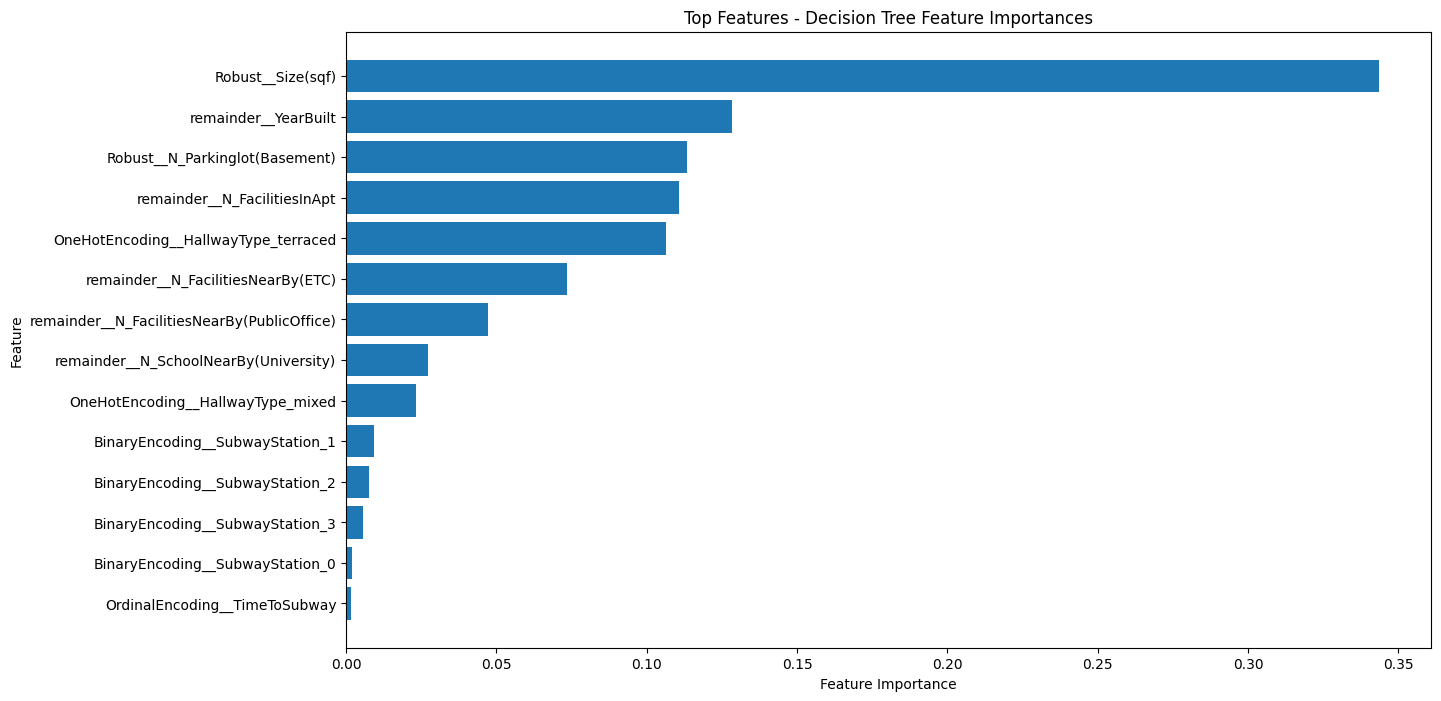

In [49]:
# Get feature importance and names
feature_importances = best_forest_pipe.named_steps['model'].feature_importances_
feature_names = best_forest_pipe.named_steps['preprocessing'].get_feature_names_out()

# Plot the figure
plt.figure(figsize=(14, 8))
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=True)
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features - Decision Tree Feature Importances')
plt.show()

The feature importance graph reveals that the size of the unit has the greatest impact on apartment pricing, followed by the construction year and the number of parking lots. Furthermore, the duration to the subway and the names of nearby subway stations are the least influential features in determining pricing.

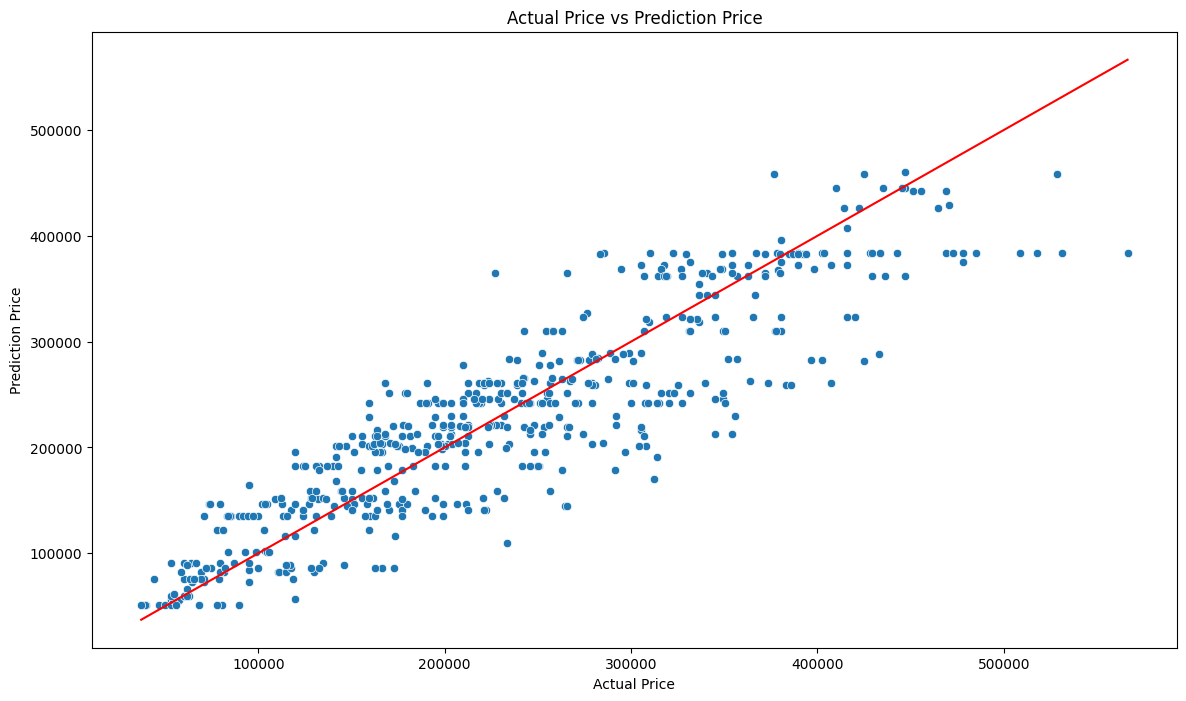

In [50]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=ytest, y=ypred)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='-')

plt.title('Actual Price vs Prediction Price')
plt.xlabel('Actual Price' )
plt.ylabel('Prediction Price')

plt.show()


The regression graph above illustrates the correlation between the predicted prices generated by our machine learning algorithm and the actual prices in our dataset. We observe a strong correlation for prices below 450,000 won. However, above this threshold, the correlation between actual and predicted prices appears more varied.

## **Conclusion and Recommendation**

### **Conclusion**:

After conducting modeling and testing using various regression models, we obtained evaluation results based on the metrics used. The tested models include Random Forest Regressor, Decision Tree Regressor, KNN Regressor, Linear Regression, and SVR.

We conducted benchmarking for all five models, and found that Random Forest and Decision Tree achieved the lowest MAPE means of -0.190 and -0.191, respectively. Subsequently, we tested both models on our training dataset, resulting in a MAPE score of 19.3% for the Random Forest Regressor Model and 19.7% for the Decision Tree Regressor Model.

Following hyperparameter tuning to achieve lower MAPE scores, we observed that the Random Forest Regressor had a MAPE score of 18.3%, while the Decision Tree Regressor achieved a MAPE score of 18.1%. Since the Decision Tree Regressor exhibited a lower MAPE score after tuning, we then analyzed the feature importance of the Decision Tree Regressor Model to identify which features have the greatest impact on apartment pricing.

According to Lewis (1982), a model with a MAPE value between 10% and 20% can be interpreted as having good forecasting ability. Therefore, this tuned Decision Tree Regressor model can be considered good at predicting apartment prices in Daegu.

### **Recommendation**:

1. Model Optimization: Despite the Decision Tree Regressor displaying the best performance among the tested models, there's still potential for enhancement. Therefore, further exploration is suggested to incorporate additional features that might impact apartment prices in Daegu.

2. Parameter Fine-Tuning: As a follow-up, it's recommended to fine-tune the model parameters. Adjusting these parameters could potentially improve model accuracy.

3. Model Integration: Utilize this model as a supplementary tool for determining apartment selling prices. This will aid real estate agents in maximizing profits and increasing sales success rates.

4. Training for Real Estate Agents: Real estate agents should undergo training to comprehend this model and its functionalities. They should be adept at applying this knowledge in their sales strategies.

5. Further Investigate Features: Conduct additional analysis on the most influential features affecting apartment prices to gain deeper insights into the Daegu apartment market. These features can be scrutinized further to understand their impact on apartment prices.








In [51]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(dt_best_pipe, open(filename, 'wb'))